In [28]:
import numpy as np
import pandas as pd
from numpy.fft import fft
from matplotlib import pyplot as plt
import math
import warnings,os
import glob
from scipy.signal import find_peaks
warnings.filterwarnings('ignore')

Import dataset

In [29]:
import random
def print_original_plot(name,path,outlier_delete=False):
  material=path+name
  filename="/all_result.csv"
  df=pd.read_csv(material+filename)
  df=df.dropna(axis=0) # drop the unconsistent data long
  df=df.drop(list(df)[0],axis=1)
  # print(df.describe())
  if outlier_delete:
    randomlist = random.sample(range(0, len(df)), 1000)
    for i in randomlist:
      mean = df.iloc[i].mean()
      std = df.iloc[i].std()

      z_scores = (df.iloc[i] - mean) / std

      mask = np.abs(z_scores) > 5
      # print(mask)
      drop_col=[]
      for i in range(len(mask)):
        if mask[i]:
          drop_col.append(df.columns[i])
      df.drop(drop_col,axis=1, inplace=True)
  
  # print(df.shape)
  # # print(df)
  # df.plot(kind='line',alpha=0.5, figsize=(10, 4),title=name+' orignal data plot',legend=False)
  # df.plot(kind='hist',alpha=0.5, figsize=(10, 10),title=name+" orignal data plot",legend=False)
  return df

In [78]:
path="./data/11.1/material_classification_train_sets/"
folder_list = os.listdir(path)
df_all=pd.DataFrame()
# labellist=['alu_hollow_thick','alu_hollow_thin','alu','brass_hollow','brass','printpla','pla','printresin','wood']
# labellist=['brass_hollow','brass','printpla','pla','printresin','wood']
# labellist=['alu','brass','printpla','pla','printresin','wood']
labellist=folder_list
# labellist=['center','edge','middle']
# labellist=['full','stand','point']
# labellist=['1','2']
for name in folder_list:
  df_temp=print_original_plot(name=name,path=path)
  label=""
  for i in labellist:
    if i == name :
      label=i
      break
  if (label==''): continue
  print(label,name)
  df_temp.loc['label']=[labellist.index(label) for _ in list(df_temp)]
  df_all = pd.concat([df_all, df_temp], axis=1)


bra_hollow bra_hollow
bra bra
alu_thick_hollow alu_thick_hollow
pla pla
woo woo
alu_thin_hollow alu_thin_hollow
printpla printpla
printresin printresin
alu alu


In [79]:
df_all2=pd.DataFrame()
path_2="./data/11.1/material_classification_test_sets/"
folder_list_2 = os.listdir(path_2)
for name in folder_list_2:
  # if ('2' in name ): continue
  df_temp=print_original_plot(name=name,path=path_2)
  label=""
  for i in labellist:
    if i == name :
      label=i
      break
  if (label==''): continue
  print(label,name)
  df_temp.loc['label']=[labellist.index(label) for _ in list(df_temp)]
  df_all2 = pd.concat([df_all2, df_temp], axis=1,ignore_index=True)

bra_hollow bra_hollow
bra bra
alu_thick_hollow alu_thick_hollow
pla pla
woo woo
alu_thin_hollow alu_thin_hollow
printpla printpla
printresin printresin
alu alu


In [80]:
df_all=df_all.dropna(axis=0)
df_all2=df_all2.dropna(axis=0)
df_all = pd.concat([df_all.iloc[:42000], df_all.iloc[[-1]]], axis=0,ignore_index = True)
df_all2 = pd.concat([df_all2.iloc[:42000], df_all2.iloc[[-1]]], axis=0,ignore_index = True)

In [81]:
temp = df_all.iloc[:-1, :]  # All rows except the last one (data points)
data_length=len(temp)
BIN_SIZE=500
GAP_SIZE=100
row_selects=[]
for i in range (math.floor(data_length/GAP_SIZE)):
    if(i*GAP_SIZE+BIN_SIZE>=data_length):break
    row_selects.append([])
    
    for j in range(BIN_SIZE):
        if(i*GAP_SIZE+j>data_length):break
        row_selects[i].append(i*GAP_SIZE+j)
    row_selects[i].append(data_length)
print(row_selects[0])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [82]:
df_part=[df_all.iloc[row_selects[i]] for i in range(len(row_selects))]
df_part2=[df_all2.iloc[row_selects[i]] for i in range(len(row_selects))]

In [83]:
df_part[0]

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,18.0,84.0,32.0,-24.0,29.0,-12.0,-25.0,147.0,76.0,-37.0,...,46.0,-16.0,-55.0,90.0,10.0,3.0,18.0,90.0,54.0,-50.0
1,18.0,-93.0,-31.0,-11.0,14.0,-8.0,-79.0,-121.0,-82.0,4.0,...,49.0,20.0,32.0,-116.0,-45.0,5.0,64.0,-59.0,-97.0,80.0
2,15.0,142.0,-10.0,3.0,13.0,-1.0,85.0,129.0,75.0,4.0,...,45.0,-9.0,-76.0,80.0,0.0,9.0,15.0,111.0,94.0,-54.0
3,15.0,-122.0,8.0,-31.0,28.0,-7.0,-173.0,-71.0,-54.0,-38.0,...,46.0,0.0,41.0,-78.0,-28.0,6.0,58.0,-57.0,-118.0,67.0
4,13.0,144.0,-51.0,20.0,-7.0,-2.0,155.0,58.0,42.0,42.0,...,47.0,9.0,-73.0,20.0,-19.0,7.0,26.0,82.0,79.0,-24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,-19.0,-265.0,202.0,118.0,35.0,16.0,-378.0,-195.0,-235.0,134.0,...,-22.0,-83.0,-23.0,66.0,93.0,4.0,-62.0,-13.0,-23.0,-18.0
497,-20.0,155.0,-231.0,-127.0,-1.0,13.0,371.0,335.0,248.0,-163.0,...,-24.0,33.0,50.0,-15.0,-17.0,4.0,79.0,-50.0,-59.0,-3.0
498,-20.0,-95.0,89.0,103.0,-24.0,9.0,-279.0,-414.0,-175.0,181.0,...,-20.0,-49.0,-25.0,73.0,51.0,5.0,-62.0,-11.0,6.0,-37.0
499,-22.0,-39.0,-89.0,-79.0,58.0,16.0,217.0,488.0,145.0,-174.0,...,-24.0,-3.0,41.0,-18.0,29.0,-1.0,63.0,-41.0,-76.0,5.0


In [84]:
df_part2[2]

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
200,229.0,-92.0,-110.0,187.0,-24.0,290.0,473.0,273.0,-82.0,209.0,...,41.0,363.0,25.0,274.0,37.0,151.0,17.0,61.0,92.0,-16.0
201,249.0,627.0,222.0,363.0,101.0,285.0,44.0,329.0,163.0,403.0,...,41.0,428.0,85.0,244.0,12.0,167.0,0.0,54.0,34.0,118.0
202,259.0,-90.0,-152.0,263.0,21.0,284.0,615.0,141.0,-28.0,198.0,...,39.0,366.0,25.0,337.0,71.0,201.0,45.0,29.0,79.0,13.0
203,277.0,570.0,231.0,270.0,47.0,277.0,12.0,457.0,84.0,378.0,...,44.0,416.0,89.0,263.0,-15.0,220.0,-21.0,96.0,51.0,71.0
204,298.0,38.0,-115.0,351.0,76.0,271.0,624.0,65.0,52.0,234.0,...,43.0,387.0,37.0,363.0,84.0,248.0,62.0,3.0,59.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,-110.0,-55.0,207.0,422.0,-25.0,13.0,-79.0,490.0,-536.0,313.0,...,-228.0,-75.0,-318.0,-66.0,-278.0,-115.0,-207.0,-136.0,-276.0,-159.0
697,-110.0,85.0,-452.0,-429.0,-270.0,15.0,-132.0,-496.0,250.0,-266.0,...,-228.0,-21.0,-259.0,-132.0,-314.0,-101.0,-266.0,-144.0,-242.0,-167.0
698,-103.0,-61.0,-3.0,455.0,-172.0,17.0,-44.0,507.0,-513.0,275.0,...,-220.0,-54.0,-314.0,-69.0,-279.0,-108.0,-199.0,-158.0,-291.0,-139.0
699,-103.0,71.0,-201.0,-377.0,-110.0,15.0,-178.0,-429.0,167.0,-172.0,...,-222.0,-29.0,-262.0,-119.0,-315.0,-90.0,-291.0,-114.0,-219.0,-173.0


In [69]:
def fft_self(df):
    data_rows = df.iloc[:-1, :]  # All rows except the last
    label_row = df.iloc[-1, :]    # Last row (label)

    # Apply FFT on each column except the last row
    fft_result = data_rows.apply(lambda col: np.abs(np.fft.fft(col)), axis=0)

    # Append the label row to the FFT result
    fft_result.loc['label'] = label_row
    return fft_result

In [85]:
df_part_fft=[fft_self(df_part[i]) for i in range(len(df_part))]
df_part2_fft=[fft_self(df_part2[i]) for i in range(len(df_part2))]

In [86]:
df_part_fft[0]

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2680.000000,6348.000000,11307.000000,7552.000000,2460.000000,1211.000000,1935.000000,1520.000000,1350.000000,361.000000,...,1749.000000,2941.000000,12802.000000,6270.000000,2290.000000,9029.000000,10419.000000,2038.000000,10525.000000,3031.000000
1,4716.235429,1721.833054,3719.735629,3533.633095,2897.013440,451.653585,1383.306690,2221.458981,2583.407884,1813.430139,...,3177.871390,919.035106,2895.675308,2563.304123,5978.726534,4580.445990,2465.728892,4058.002105,1094.823147,1893.922585
2,3588.470936,3069.728045,2462.937441,755.868678,3438.775986,1881.372207,63.950883,2133.755024,2472.895550,2651.878296,...,1342.494917,2523.780823,2261.924605,4981.467456,2725.461453,2968.235589,236.508476,2147.901352,4351.486280,269.658483
3,1470.834873,180.442010,307.224980,26.931479,1265.519202,1127.929644,1655.468107,1094.839006,2424.752054,1241.920550,...,3705.369164,1061.252964,1021.688080,2920.157717,2034.156384,1083.414567,2808.783509,3458.933170,1053.910110,1236.440401
4,844.933924,1372.345077,1129.024635,1438.530622,2021.493525,966.543292,672.623686,1037.197891,2110.175212,1266.300290,...,3490.505742,514.299613,2024.949072,2445.320831,2309.968059,538.732642,757.491246,1116.383088,1524.633568,248.285086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,844.933924,1372.345077,1129.024635,1438.530622,2021.493525,966.543292,672.623686,1037.197891,2110.175212,1266.300290,...,3490.505742,514.299613,2024.949072,2445.320831,2309.968059,538.732642,757.491246,1116.383088,1524.633568,248.285086
497,1470.834873,180.442010,307.224980,26.931479,1265.519202,1127.929644,1655.468107,1094.839006,2424.752054,1241.920550,...,3705.369164,1061.252964,1021.688080,2920.157717,2034.156384,1083.414567,2808.783509,3458.933170,1053.910110,1236.440401
498,3588.470936,3069.728045,2462.937441,755.868678,3438.775986,1881.372207,63.950883,2133.755024,2472.895550,2651.878296,...,1342.494917,2523.780823,2261.924605,4981.467456,2725.461453,2968.235589,236.508476,2147.901352,4351.486280,269.658483
499,4716.235429,1721.833054,3719.735629,3533.633095,2897.013440,451.653585,1383.306690,2221.458981,2583.407884,1813.430139,...,3177.871390,919.035106,2895.675308,2563.304123,5978.726534,4580.445990,2465.728892,4058.002105,1094.823147,1893.922585


In [87]:
df_part2_fft[2]

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
200,2974.000000,26577.000000,8964.000000,24707.000000,1693.000000,31221.000000,8711.000000,29416.000000,4079.000000,25246.000000,...,8968.000000,3624.000000,8767.000000,9630.000000,3831.000000,647.000000,14431.000000,2648.000000,13828.000000,8098.000000
201,52402.995294,45001.851331,52796.515085,45500.322607,52086.704042,40635.248183,53285.836273,44685.831864,49989.391416,44427.551639,...,49211.227306,49344.137002,51229.203745,51750.989725,51176.018202,50827.717709,47296.383697,51891.044656,49180.091102,51265.319813
202,41615.659103,28662.581640,42108.157208,32914.891266,41527.036504,24853.315085,41909.630961,29687.428737,42225.543491,33250.422582,...,40269.551285,38729.096946,38452.439052,42227.645663,35367.260732,41209.417205,33516.258110,44229.698648,29919.465016,40208.443691
203,14760.576953,3315.873516,13993.233991,1571.028258,14997.438340,8228.527352,14324.516369,2945.769072,15530.409575,795.190957,...,13765.360295,12348.707814,14160.959435,12328.061018,9908.996911,15525.768303,8427.234006,15991.194757,9373.957520,15096.257348
204,3598.983276,10497.945153,2286.700557,9877.048338,2145.111443,9793.824291,5567.763559,12094.045702,2215.040765,12018.264384,...,2805.762310,7631.691300,7897.386721,4224.357412,9433.607478,5186.244384,8831.802169,1915.869358,10345.317645,2447.133131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,3598.983276,10497.945153,2286.700557,9877.048338,2145.111443,9793.824291,5567.763559,12094.045702,2215.040765,12018.264384,...,2805.762310,7631.691300,7897.386721,4224.357412,9433.607478,5186.244384,8831.802169,1915.869358,10345.317645,2447.133131
697,14760.576953,3315.873516,13993.233991,1571.028258,14997.438340,8228.527352,14324.516369,2945.769072,15530.409575,795.190957,...,13765.360295,12348.707814,14160.959435,12328.061018,9908.996911,15525.768303,8427.234006,15991.194757,9373.957520,15096.257348
698,41615.659103,28662.581640,42108.157208,32914.891266,41527.036504,24853.315085,41909.630961,29687.428737,42225.543491,33250.422582,...,40269.551285,38729.096946,38452.439052,42227.645663,35367.260732,41209.417205,33516.258110,44229.698648,29919.465016,40208.443691
699,52402.995294,45001.851331,52796.515085,45500.322607,52086.704042,40635.248183,53285.836273,44685.831864,49989.391416,44427.551639,...,49211.227306,49344.137002,51229.203745,51750.989725,51176.018202,50827.717709,47296.383697,51891.044656,49180.091102,51265.319813


In [88]:
df_part_fft[-1]

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
41400,797.000000,2591.000000,9594.000000,6386.000000,4263.000000,4550.000000,64.000000,1440.000000,497.000000,636.000000,...,2207.000000,3239.000000,7132.000000,9823.000000,4933.000000,5728.000000,4726.000000,1703.000000,4279.000000,9593.000000
41401,3958.176506,6758.316997,4127.141010,2274.109470,967.535698,5699.436036,2116.509327,3062.063074,2581.171346,2091.780800,...,683.966819,4240.988760,4043.650764,4664.362630,2584.763734,4628.132734,4093.782471,3790.122659,1348.853724,823.401586
41402,2449.645874,2039.842452,1119.184918,3633.077526,558.777563,3295.619997,1044.795756,531.704536,800.553973,1717.251328,...,2782.276343,552.984692,1942.329453,2883.983496,3021.090667,3486.945218,3697.880841,3212.374596,730.522570,1766.323803
41403,1446.681256,1542.594416,1024.731389,847.721622,878.259184,1413.939218,1069.884420,483.800480,1346.642967,786.617939,...,1719.850722,2203.612038,1067.985818,916.019059,1926.685076,3453.664936,2545.115709,1262.707579,705.696126,2798.192384
41404,594.434521,1485.429862,2221.303509,1669.254641,1006.907320,545.894789,1709.593428,667.183119,527.002235,1539.534093,...,1799.011335,1370.405765,1454.744760,178.447916,1113.172911,2149.899266,569.336621,76.563365,797.844076,911.920664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41896,594.434521,1485.429862,2221.303509,1669.254641,1006.907320,545.894789,1709.593428,667.183119,527.002235,1539.534093,...,1799.011335,1370.405765,1454.744760,178.447916,1113.172911,2149.899266,569.336621,76.563365,797.844076,911.920664
41897,1446.681256,1542.594416,1024.731389,847.721622,878.259184,1413.939218,1069.884420,483.800480,1346.642967,786.617939,...,1719.850722,2203.612038,1067.985818,916.019059,1926.685076,3453.664936,2545.115709,1262.707579,705.696126,2798.192384
41898,2449.645874,2039.842452,1119.184918,3633.077526,558.777563,3295.619997,1044.795756,531.704536,800.553973,1717.251328,...,2782.276343,552.984692,1942.329453,2883.983496,3021.090667,3486.945218,3697.880841,3212.374596,730.522570,1766.323803
41899,3958.176506,6758.316997,4127.141010,2274.109470,967.535698,5699.436036,2116.509327,3062.063074,2581.171346,2091.780800,...,683.966819,4240.988760,4043.650764,4664.362630,2584.763734,4628.132734,4093.782471,3790.122659,1348.853724,823.401586


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import KernelPCA
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pickle 

In [90]:
result={}
for i in range(len(df_part_fft)):
    df = df_part_fft[i].T
    X=df.drop("label",axis=1)
    y=df["label"].astype(int)
    df2 = df_part2_fft[i].T
    X2=df2.drop("label",axis=1)
    y2=df2["label"].astype(int)
    X_train, X_test, y_train, y_test = X,X2,y,y2
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    result[str(i)]=np.array(accuracy * 100)
    print('Group '+str(i))
    print(f"Accuracy: {accuracy * 100:.2f}%")
result_df = pd.DataFrame.from_dict(result, orient='index', columns=['Accuracy'])


Group 0
Accuracy: 33.33%
Group 1
Accuracy: 31.11%
Group 2
Accuracy: 33.33%
Group 3
Accuracy: 32.22%
Group 4
Accuracy: 33.33%
Group 5
Accuracy: 31.11%
Group 6
Accuracy: 33.33%
Group 7
Accuracy: 33.33%
Group 8
Accuracy: 30.00%
Group 9
Accuracy: 18.89%
Group 10
Accuracy: 17.78%
Group 11
Accuracy: 16.67%
Group 12
Accuracy: 12.22%
Group 13
Accuracy: 11.11%
Group 14
Accuracy: 14.44%
Group 15
Accuracy: 17.78%
Group 16
Accuracy: 5.56%
Group 17
Accuracy: 8.89%
Group 18
Accuracy: 11.11%
Group 19
Accuracy: 14.44%
Group 20
Accuracy: 14.44%
Group 21
Accuracy: 11.11%
Group 22
Accuracy: 11.11%
Group 23
Accuracy: 11.11%
Group 24
Accuracy: 11.11%
Group 25
Accuracy: 11.11%
Group 26
Accuracy: 11.11%
Group 27
Accuracy: 12.22%
Group 28
Accuracy: 11.11%
Group 29
Accuracy: 11.11%
Group 30
Accuracy: 11.11%
Group 31
Accuracy: 11.11%
Group 32
Accuracy: 11.11%
Group 33
Accuracy: 11.11%
Group 34
Accuracy: 11.11%
Group 35
Accuracy: 11.11%
Group 36
Accuracy: 11.11%
Group 37
Accuracy: 11.11%
Group 38
Accuracy: 11.11

In [91]:
result_df.to_csv('specific frequency 6.csv')

<Axes: >

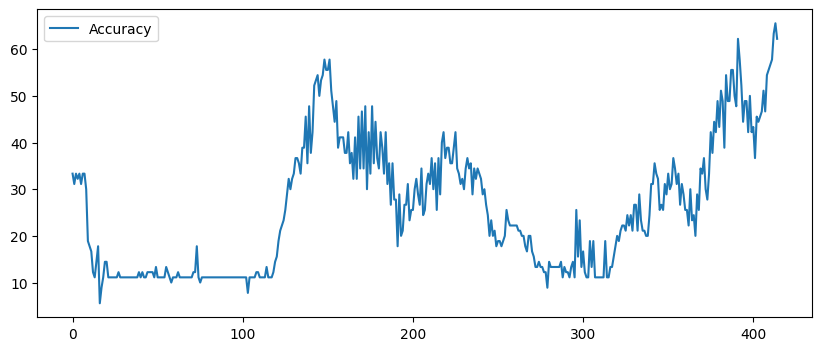

In [92]:
result_df.plot(figsize=(10, 4))

In [36]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=32)
X_train, X_test, y_train, y_test = X,X2,y,y2
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 83.33%


Classification Report:
                  precision    recall  f1-score   support

      bra_hollow       0.80      1.00      0.89         8
             bra       1.00      0.80      0.89         5
alu_thick_hollow       1.00      0.64      0.78        14
             pla       0.73      0.89      0.80         9
             woo       0.64      0.88      0.74         8
 alu_thin_hollow       0.91      0.83      0.87        12
        printpla       0.79      0.85      0.81        13
      printresin       0.82      0.82      0.82        11
             alu       1.00      0.90      0.95        10

        accuracy                           0.83        90
       macro avg       0.85      0.84      0.84        90
    weighted avg       0.86      0.83      0.83        90



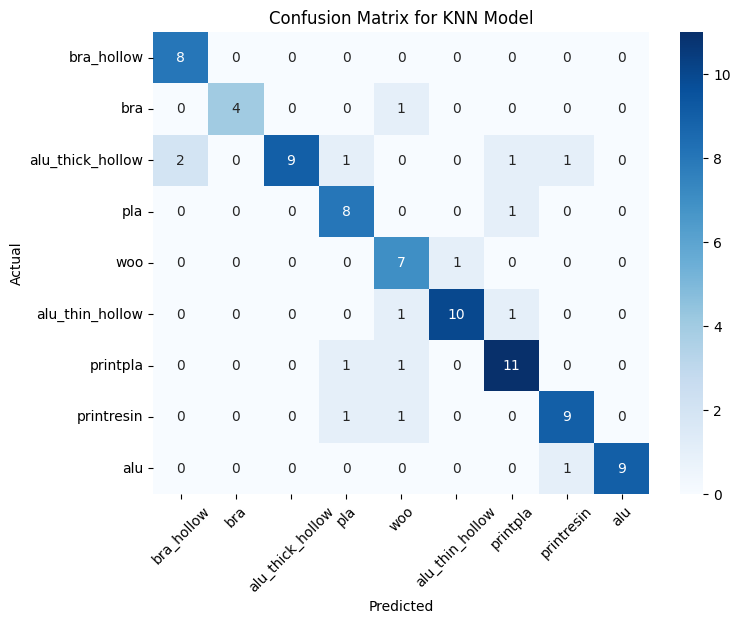

In [37]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=labellist))
temp=classification_report(y_test, y_pred, target_names=labellist, output_dict=True)
output=pd.DataFrame(temp)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labellist, yticklabels=labellist)
plt.xlabel('Predicted',)
plt.xticks(rotation=45)
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Model')
plt.show()

Save output

In [165]:
output.T.to_csv('contact_withoutPoint_train_11_04_test_11_04_after_fft.csv')

In [72]:

pickle.dump(knn, open("Knn_train_11_01", 'wb'))

Load the model

In [73]:
my_model_clf = pickle.load(open("Knn_train_11_01", 'rb')) 
result_score = my_model_clf.score(X_test,y_test) 
print("Score: ",result_score)

Score:  0.8777777777777778
